# Assignment 3 | Text Generation & Latent Space Visualization 

Student 1 + ID: Bashar Beshoti, 207370248

Student 2 + ID: Selan Abu Saleh, 212111439

__Introduction:__ 

This assignment explores two fascinating aspects of deep learning, 
using sequential models for text generation in natural language 
processing (NLP) and visualizing latent representations in generative 
models.

Through this assignment, you will gain hands-on experience with key 
concepts in sequence learning and a taste of generative AI, helping you 
build an intuitive understanding of model capabilities and 
representations.

## Pre-Task
Importing Libraries:

In [47]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import re

import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from wordcloud import WordCloud

# Seciton 1: Song Lyrics Generation

## Download and Import Data
- The first task you are going to tackle is associated with text generation. 
- The first step is to download the data from the website.
The data is given as a csv file which contains the artist name, song name and song lyrics.

In [48]:
# Import Data
songs_csv_path = r'C:\Users\pc\Desktop\Root\University_Courses\DeepLearning\HW3\data\Songs.csv'

# Import the file into the notebook
songs_df = pd.read_csv(songs_csv_path)

## Study The Data
### Showcase a Couple of Rows
Display a few rows from the dataset to understand its structure.

In [49]:
# Showcase a couple of rows from the dataset
songs_df.head()

,Artist,Title,Lyrics
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co..."
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a..."
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say..."
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...


### Print Artist Names and Song Counts
Print all artist names and the number of songs associated with each artist.

In [50]:
# Print all artist names
artist_names = songs_df['Artist'].unique()
print("Artist Names:")
print(artist_names)

# Print the number of songs associated with each artist
song_counts = songs_df['Artist'].value_counts()
print("\nNumber of Songs per Artist:")
print(song_counts)

Artist Names:
['Taylor Swift' 'Billie Eilish' 'The Beatles' 'David Bowie' 'Billy Joel'
 'Ed Sheeran' 'Eric Clapton' 'Bruce Springsteen' 'Vance Joy'
 'Lana Del Rey' 'Bryan Adams' 'Leonard Cohen' 'Nat King Cole'
 '\u200btwenty one pilots' 'Ray LaMontagne' 'Bob Dylan' 'John Denver'
 'Frank Sinatra' 'Queen' 'Elton John' 'George Michael']

Number of Songs per Artist:
Artist
Taylor Swift          50
Billie Eilish         50
David Bowie           50
Billy Joel            50
Eric Clapton          50
Leonard Cohen         50
Bruce Springsteen     40
The Beatles           35
Vance Joy             30
Bryan Adams           30
Lana Del Rey          30
Nat King Cole         30
​twenty one pilots    30
Elton John            30
Ray LaMontagne        30
John Denver           30
Frank Sinatra         30
George Michael        30
Queen                 30
Ed Sheeran            20
Bob Dylan             20
Name: count, dtype: int64


### Dataset Size and Song Count
Print the size of the dataset and the total number of songs.

In [51]:
# Print the size of the dataset and the total number of songs

# Print the size of the dataset
dataset_size = songs_df.shape
print("Dataset Size (rows, columns):", dataset_size)

# Print the total number of songs
total_songs = len(songs_df)
print("Total Number of Songs:", total_songs)

Dataset Size (rows, columns): (745, 3)
Total Number of Songs: 745


### Average Song Length
Calculate and print the average number of characters and words per song.

In [52]:
# Calculate and print the average number of characters and words per song

# Calculate the average number of characters per song
average_chars_per_song = songs_df['Lyrics'].apply(len).mean()
print("Average Number of Characters per Song:", average_chars_per_song)

# Calculate the average number of words per song
average_words_per_song = songs_df['Lyrics'].apply(lambda x: len(x.split())).mean()
print("Average Number of Words per Song:", average_words_per_song)

Average Number of Characters per Song: 1403.3476510067114
Average Number of Words per Song: 276.26040268456376


### Word Cloud Visualization
Create a word cloud image to visualize the most used words in the lyrics.

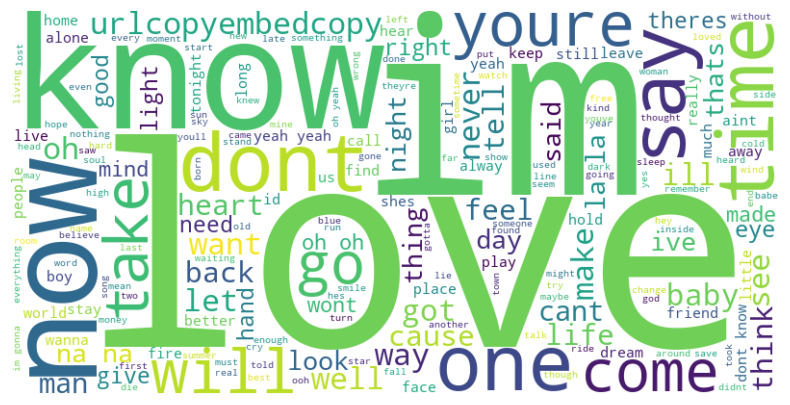

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Combine all lyrics into a single string
all_lyrics = ' '.join(songs_df['Lyrics'].tolist())

# Remove punctuation and convert to lowercase
all_lyrics_cleaned = re.sub(r'[^\w\s]', '', all_lyrics).lower()

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics_cleaned)

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Top 3 Most Used Words
Identify and print the top 3 most used words in the song lyrics.

In [54]:
# Identify and print the top 3 most used words in the song lyrics

from collections import Counter
import re

# Split the lyrics into words
words = all_lyrics_cleaned.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 3 most common words
top_3_words = word_counts.most_common(3)

# Print the top 3 most used words
print("Top 3 Most Used Words:")
for word, count in top_3_words:
    print(f"{word}: {count}")

Top 3 Most Used Words:
the: 8146
you: 7096
i: 6888


## Pre-processing
The procedure for preprocessing data for NLP tasks is very straightforward.
- Create Corpus from the song lyrics.
- Remove any unrequired characters from the corpus, to do that you have to look in the corpus and check out if you got unnecessary symbols such as foreign language characters … etc.
- Encode the data to make it ready for training the model.

In [55]:
# Create Corpus from the song lyrics
corpus = songs_df['Lyrics'].tolist()

# Remove any unrequired characters from the corpus
corpus_cleaned = [re.sub(r'[^\w\s]', '', song).lower() for song in corpus]

# Encode the data to make it ready for training the model
# We will use a character-level encoding for simplicity

# Create a set of all unique characters in the corpus
chars = sorted(list(set(''.join(corpus_cleaned))))

# Create a dictionary to map each character to an index
char_to_index = {char: index for index, char in enumerate(chars)}

# Encode the corpus
encoded_corpus = [[char_to_index[char] for char in song] for song in corpus_cleaned]

print("Sample encoded song:", encoded_corpus[0])

Sample encoded song: [33, 20, 25, 31, 12, 18, 16, 1, 31, 16, 16, 1, 13, 29, 12, 25, 15, 1, 25, 16, 34, 1, 27, 19, 26, 25, 16, 0, 19, 20, 18, 19, 1, 19, 16, 16, 23, 30, 1, 26, 25, 1, 14, 26, 13, 13, 23, 16, 30, 31, 26, 25, 16, 30, 0, 34, 19, 16, 25, 1, 36, 26, 32, 1, 12, 29, 16, 1, 36, 26, 32, 25, 18, 1, 31, 19, 16, 36, 1, 12, 30, 30, 32, 24, 16, 1, 36, 26, 32, 1, 22, 25, 26, 34, 59, 25, 26, 31, 19, 20, 25, 18, 0, 30, 16, 28, 32, 20, 25, 59, 30, 24, 20, 23, 16, 1, 13, 23, 12, 14, 22, 1, 23, 20, 27, 30, 31, 20, 14, 22, 0, 30, 16, 25, 30, 32, 12, 23, 59, 27, 26, 23, 20, 31, 20, 14, 30, 0, 34, 19, 16, 25, 1, 36, 26, 32, 1, 12, 29, 16, 1, 36, 26, 32, 25, 18, 1, 31, 19, 16, 36, 1, 12, 30, 30, 32, 24, 16, 59, 36, 26, 32, 1, 22, 25, 26, 34, 1, 25, 26, 31, 19, 20, 25, 18, 0, 0, 13, 32, 31, 1, 20, 1, 22, 25, 16, 34, 1, 36, 26, 32, 0, 15, 12, 25, 14, 20, 25, 1, 20, 25, 1, 36, 26, 32, 29, 1, 23, 16, 33, 20, 30, 0, 15, 29, 32, 25, 22, 1, 32, 25, 15, 16, 29, 1, 12, 1, 30, 31, 29, 16, 16, 31, 23, 20,

## Model Definition and training:
### Define LSTM Model
Use an LSTM model that can handle sequential data, as well as any loss function and optimizer of your choosing that you think is suitable for this task to train the model on the data.

In [56]:
class LyricsLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers):
        super(LyricsLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.lstm(x, hidden)
        out = self.fc(out)
        return out, hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.num_layers, batch_size, self.hidden_dim).zero_(),
                  weight.new(self.num_layers, batch_size, self.hidden_dim).zero_())
        return hidden

# Hyperparameters
vocab_size = len(chars)
embedding_dim = 128
hidden_dim = 256
num_layers = 2
learning_rate = 0.001

# Model, loss function, and optimizer
model = LyricsLSTM(vocab_size, embedding_dim, hidden_dim, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Train Model
Train the model on the lyrics such that it can be used to generate new 
lyrics afterwards, train it for 100 epochs and plot the training loss as a 
function to the number of epochs.

In [57]:
# Training the model
num_epochs = 100
batch_size = 32
seq_length = 100

# Prepare the data for training
def get_batches(encoded_corpus, batch_size, seq_length):
    # Flatten the encoded corpus
    encoded_text = np.concatenate(encoded_corpus)
    total_length = len(encoded_text)
    num_batches = total_length // (batch_size * seq_length)
    
    # Reshape the data into batches
    encoded_text = encoded_text[:num_batches * batch_size * seq_length]
    encoded_text = encoded_text.reshape((batch_size, -1))
    
    for n in range(0, encoded_text.shape[1], seq_length):
        x = encoded_text[:, n:n+seq_length]
        y = np.zeros_like(x)
        y[:, :-1], y[:, -1] = x[:, 1:], x[:, 0]
        yield torch.tensor(x, dtype=torch.long), torch.tensor(y, dtype=torch.long)

# Training loop
losses = []
for epoch in range(num_epochs):
    hidden = model.init_hidden(batch_size)
    epoch_loss = 0
    for x, y in get_batches(encoded_corpus, batch_size, seq_length):
        hidden = tuple([each.data for each in hidden])
        model.zero_grad()
        output, hidden = model(x, hidden)
        loss = criterion(output.view(-1, vocab_size), y.view(-1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    losses.append(epoch_loss / len(encoded_corpus))
    if (epoch) % 10 == 0:
        print(f'Epoch {epoch}/{num_epochs}, Loss: {epoch_loss / len(encoded_corpus)}')



Epoch 0/100, Loss: 0.9562286901794024
Epoch 10/100, Loss: 0.5594329347546468
Epoch 20/100, Loss: 0.5034815229825526
Epoch 30/100, Loss: 0.4641870513058349
Epoch 40/100, Loss: 0.43530310824413426
Epoch 50/100, Loss: 0.4182707278520469
Epoch 60/100, Loss: 0.4025058355907466
Epoch 70/100, Loss: 0.39251420833920475
Epoch 80/100, Loss: 0.382083809055738
Epoch 90/100, Loss: 0.3712921212183549


### Plot Training Loss
Plot the training loss as a function of the number of epochs.

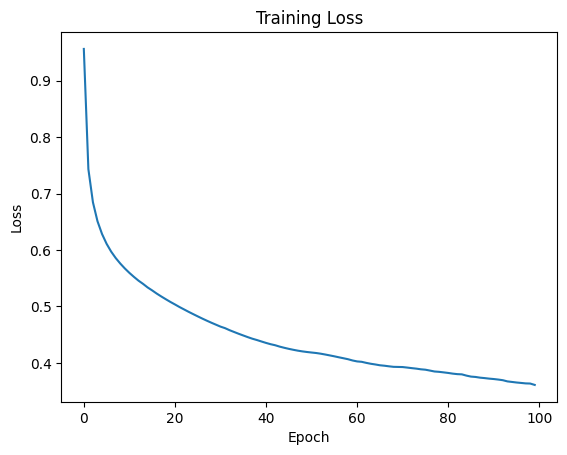

In [58]:
# Plot the training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

## Evaluation
### Define LyricsGenerator Function
Define a function to generate new lyrics based on a starting string and character count.
`Def LyricsGenerator(starting_string, char_count)` - The model should take the starting string as a prior and start generating new lyrics after that string, and it should stop generating once it 
reaches the character count.

NOTE: In class, we learned multiple generation strategies (such as top-k, top-p …), make sure you use a suitable strategy.


Since you are going to experiment with multiple strategies, write in a text box the strategy you used and how the algorithm works in your case, as well as a couple of results from previous strategies you didn’t end up choosing, showcase the difference between the generations.

In [59]:
def LyricsGenerator(starting_string, char_count, strategy='top_k', k=5, p=0.8):
    model.eval()
    generated = starting_string.strip()
    
    # Convert starting string to indices
    input_indices = [char_to_index.get(char, 0) for char in starting_string]
    
    if len(input_indices) == 0:
        random_char = np.random.choice(list(char_to_index.values()))
        input_indices = [random_char]
        generated = chars[random_char]
    
    input_tensor = torch.tensor(input_indices, dtype=torch.long).unsqueeze(0)
    
    hidden = model.init_hidden(1)
    
    while len(generated) < char_count:
        with torch.no_grad():
            output, hidden = model(input_tensor, hidden)
            last_logits = output[0, -1, :]
            probs = torch.softmax(last_logits, dim=0)
            
            if strategy == 'greedy':
                _, next_char_index = torch.max(probs, dim=0)
                next_char_index = next_char_index.item()
            elif strategy == 'top_k':
                topk_probs, topk_indices = torch.topk(probs, k)
                topk_probs = topk_probs / torch.sum(topk_probs)
                next_char_index = int(np.random.choice(topk_indices.cpu().numpy(), p=topk_probs.cpu().numpy()))
            elif strategy == 'nucleus':
                sorted_probs, sorted_indices = torch.sort(probs, descending=True)
                cumulative_probs = torch.cumsum(sorted_probs, dim=0)
                cutoff = cumulative_probs > p
                if torch.any(cutoff):
                    cutoff_index = torch.nonzero(cutoff, as_tuple=False)[0].item()
                    filtered_probs = sorted_probs[:cutoff_index+1]
                    filtered_indices = sorted_indices[:cutoff_index+1]
                else:
                    filtered_probs = sorted_probs
                    filtered_indices = sorted_indices
                filtered_probs = filtered_probs / torch.sum(filtered_probs)
                next_char_index = int(np.random.choice(filtered_indices.cpu().numpy(), p=filtered_probs.cpu().numpy()))
            else:
                raise ValueError("Unknown strategy provided.")
            
            next_char = chars[next_char_index]
            generated += next_char
            
            next_tensor = torch.tensor([[next_char_index]], dtype=torch.long)
            input_tensor = next_tensor
            
    return generated

To evaluate the model, we will generate 3 songs with different starting strings and a max character count to be the average character count of the songs in the dataset (which you extracted before).

- Song 1 starts with “ it’s not a silly little moment …”
- Song 2 starts with your favorite song’s first sentence, write down which song you chose in a text box above the cell, “ — type your favorite song’s starting string —”
- Song 3 starts with an empty string “”, this should generate a new song from scratch.

 In the end you should have a minimum of 2 generations per song using 
different strategies.

### Evaluate Generated Songs
Generate and evaluate 3 songs using different starting strings and strategies.

In [60]:
# Song 1: Starting with "it's not a silly little moment ..."
starting_string_1 = "it's not a silly little moment"
char_count = int(average_chars_per_song)

# Generate using greedy strategy
generated_song_1_greedy = LyricsGenerator(starting_string_1, char_count, strategy='greedy')
print("Generated Song 1 (Greedy):")
print(generated_song_1_greedy)

# Generate using top-k strategy
generated_song_1_top_k = LyricsGenerator(starting_string_1, char_count, strategy='top_k', k=5)
print("\nGenerated Song 1 (Top-K):")
print(generated_song_1_top_k)


Generated Song 1 (Greedy):
it's not a silly little moment in me in the wind
before the boy im out of the grave
and the wave waiting the way that im begging for me a light i was born and i went through the state of man
on the rain is coming to the sound of the cold
well i know we didnt start the fire
the moment is medical moment is medical
so i may not go well get through
we were kinda where i find it
i got the man who would you do it
when i see the stars are bright
i was a burmous the stars are brother name
push one day i gotta get alone
how i loved you so long
been the one i need you to tell me were okay you dont
the broken holehow
but if you need anyone that babe
you can pretend you dont mind
i will be your father baby
but you know i love the goddor
some would rushed up the stairs
and you would let me go and one more to see it in me my songs
the way you would lead the good tim
im your national anthem
boreder im always a true to you
i was born to real
i told you the way it was
that mi

In [61]:
# Song 2: Starting with your favorite song's first sentence
starting_string_2 = "Hello, it's me"  # Example: Adele - Hello
print("\nFavorite Song Starting String: Adele - Hello")

# Generate using greedy strategy
generated_song_2_greedy = LyricsGenerator(starting_string_2, char_count, strategy='greedy')
print("\nGenerated Song 2 (Greedy):")
print(generated_song_2_greedy)

# Generate using nucleus strategy
generated_song_2_nucleus = LyricsGenerator(starting_string_2, char_count, strategy='nucleus', p=0.8)
print("\nGenerated Song 2 (Nucleus):")
print(generated_song_2_nucleus)



Favorite Song Starting String: Adele - Hello

Generated Song 2 (Greedy):
Hello, it's mess i want it to see you back
the way you wont money you are my sight
i was born to run
the stars are going down to die lost

theres no more love like the evening
and i want the way that the road

the boys in the sun
i saw it when i tell me were okay yeah
but the state of the cold and guy
when you love me

i got that summertime summertime sadness
oh it feel so sleepin in the sun
i was born to love of me
i dont want to be your lips
and you dont know what it is
do you mister jones

you are my start to the signal inside
the waiting stones before the wind blowars begin
left to see me in the dark
i guess im leaving the landing light
i went out the soul of the road

the evening in the sun bell of the world
i tell me im not a poor by a boy of the grave
and he shall be levon
and the world is the angels sing
i want to be a big shot dressed out of the grave
and the wilder man in the sun
i saw the black queen o

In [62]:
# Song 3: Starting with an empty string
starting_string_3 = ""

# Generate using greedy strategy
generated_song_3_greedy = LyricsGenerator(starting_string_3, char_count, strategy='greedy')
print("\nGenerated Song 3 (Greedy):")
print(generated_song_3_greedy)

# Generate using top-k strategy
generated_song_3_top_k = LyricsGenerator(starting_string_3, char_count, strategy='top_k', k=5)
print("\nGenerated Song 3 (Top-K):")
print(generated_song_3_top_k)


Generated Song 3 (Greedy):
e can be heroes
jumpin streets me to the cool that i say
i wanna know what i want you to me
i want you ooh

and i will never search to you store of the grave
and you dont know what it is
do you mister jones

you are my step of the love of your life

i want you to me
i want your lover
i was born a long time in the stairs
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was blinded
i was 

## Summary

### Parameters and Variables

In [63]:
print("Parameters and Variables:\n")

print("Vocabulary Size:", vocab_size)
print("Embedding Dimension:", embedding_dim)
print("Hidden Dimension:", hidden_dim)
print("Number of Layers:", num_layers)
print("Learning Rate:", learning_rate)
print("Number of Epochs:", num_epochs)
print("Batch Size:", batch_size)

print("\nSequence Length:", seq_length)
print("Strategy for Sampling:", 'Top-K')
print("K for Top-K Sampling:", 5)

print("Strategy for Sampling:", 'Nucleus')
print("P for Nucleus Sampling:", 0.8)

Parameters and Variables:

Vocabulary Size: 62
Embedding Dimension: 128
Hidden Dimension: 256
Number of Layers: 2
Learning Rate: 0.001
Number of Epochs: 100
Batch Size: 32

Sequence Length: 100
Strategy for Sampling: Top-K
K for Top-K Sampling: 5
Strategy for Sampling: Nucleus
P for Nucleus Sampling: 0.8


### Neural Network Summary

In [64]:
# import torchsummary
# Print the model summary
# torchsummary.summary(model, (seq_length, 1))
print("Model Summary:\n")
print(model)

print("Parameters count:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Model Summary:

LyricsLSTM(
  (embedding): Embedding(62, 128)
  (lstm): LSTM(128, 256, num_layers=2, batch_first=True)
  (fc): Linear(in_features=256, out_features=62, bias=True)
)
Parameters count: 945470
